### Jupyter Notebook - Projet Final Data - Par Nicolas Hervo-Akendengue et Anthony Gachet

In [1]:
#Libraries et package a installer pour le bon fonctionnement du Notebook
#latex2exp permet de print les symbole en R
packageName<-"latex2exp" #install the arules library that provides the discretization function
if (!require(packageName, character.only = TRUE)) {
install.packages(packageName)
library(packageName, character.only = TRUE)
}

#arules permet de fournir des fonctions de discretization
packageName<-"arules" #install the arules library that provides the discretization function
library(arules)
if (!require(packageName, character.only = TRUE)) {
install.packages(packageName)
library(packageName, character.only = TRUE)
}

# Installe le package de Naive Bayes
install.packages("e1071")
library("e1071")

Le chargement a nécessité le package : latex2exp

Le chargement a nécessité le package : Matrix


Attachement du package : 'arules'


Les objets suivants sont masqués depuis 'package:base':

    abbreviate, write


Installation du package dans 'C:/Users/Anthony Gachet/AppData/Local/R/win-library/4.4'
(car 'lib' n'est pas spécifié)



le package 'e1071' a été décompressé et les sommes MD5 ont été vérifiées avec succés

Les packages binaires téléchargés sont dans
	C:\Users\Anthony Gachet\AppData\Local\Temp\Rtmpg9Bdns\downloaded_packages


Warning message:
"le package 'e1071' a été compilé avec la version R 4.4.2"


#### 1. INTRODUCTION

Nous avons été engagés par une entreprise pour enquêter sur les raisons pour lesquelles les employés démissionnent.
Sur la base des données mises à disposition par le déparement RH, nous devons déterminer quel est ou quels sont les attributs qui influencent les décisions de démission des employées.

Voici les données à ma disposition : 
- Id -> numéro d'identification unique
- satisfaction_level -> niveau de satisfaction de l’employé
- last_evaluation -> score dans la dernière évaluation
- number_project -> le nombre de projet dans lesquels l’employée participe
- average_montly_hours -> la moyenne des heures mensuelles
- time_spend_company -> temps avec l'eterprise
- work_accident -> accident du travail
- left - quitter l’entreprise - variable cible
- promotion_last_5years -> une promotion au cours de 5 dernières années
- department -> le département
- salary -> niveau de salaire

########################################################################################################

#### 2. ANALYSE EXPLORATOIRE

In [2]:
# Read the data from the CSV, we attribute the right type (depending on qualitative/quantitative choice from TP1). We also remove the ID column as we defined it as useless in the prediction
myData<- read.table("HR_prediction-all.csv",header=T,sep=",", colClasses=c("NULL", "numeric", "numeric", "factor", "numeric", "factor", "factor", "factor", "factor", "factor", "factor"))

##### 2.1 Analyse préliminaire

In [12]:
#Le nombre d'instance pour l'anayse est de 1000
nrow(myData)

#Le nombre d'attributs à analyser est de 10
ncol(myData)

[1] 10000

[1] 10

##### 2.2 Analyse exploratoire des attributs qualitatifs

[1] "Probability of variable left"

     0      1 
0.7619 0.2381 


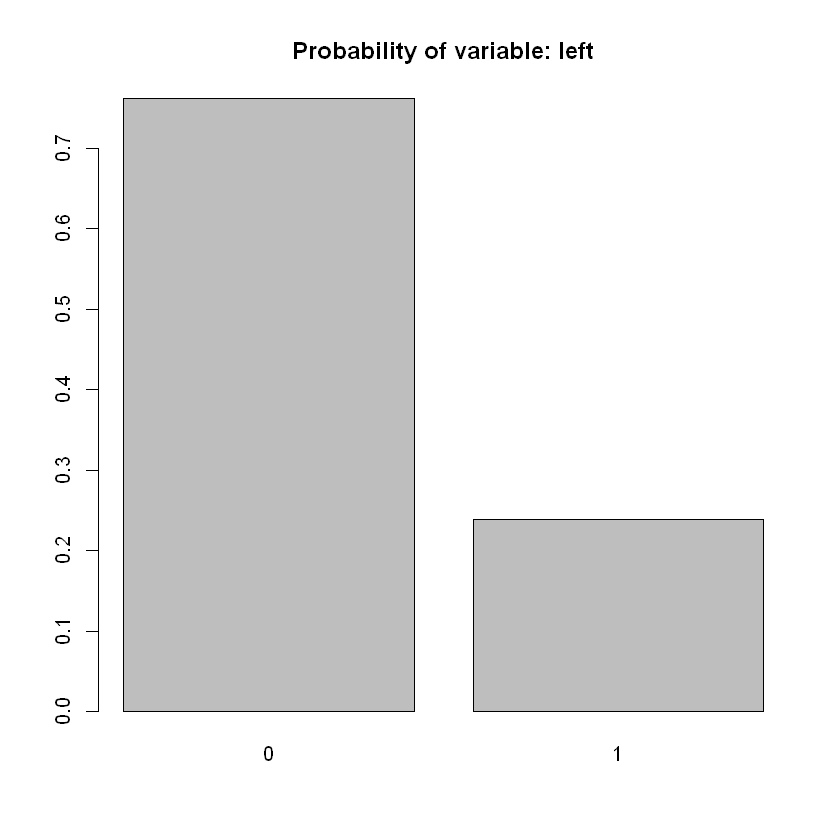

In [13]:
#On constate que la variable cible de cette analyse est "left" qui est un attribut qualitatif.
#Distribution de la variable cible et sa visualisation
index <- 7
dstr_left <- prop.table(table(myData[,index]))
print("Probability of variable left")
print(dstr_left)                     
barplot(prop.table(dstr_left), main=paste("Probability of variable:", names(myData)[index]) )

[1] "Distribution de probabilité pour 'number_project'"

     2      3      4      5      6      7 
0.1613 0.2670 0.2942 0.1828 0.0783 0.0164 

###################################
[1] "Distribution de probabilité pour 'time_spend_company'"

    10      2      3      4      5      6      7      8 
0.0146 0.2171 0.4325 0.1666 0.0984 0.0480 0.0126 0.0102 

###################################
[1] "Distribution de probabilité pour 'Work_accident'"

     0      1 
0.8541 0.1459 

###################################
[1] "Distribution de probabilité pour 'left'"

     0      1 
0.7619 0.2381 

###################################
[1] "Distribution de probabilité pour 'promotion_last_5years'"

     0      1 
0.9789 0.0211 

###################################
[1] "Distribution de probabilité pour 'department'"

 accounting          hr          IT  management   marketing product_mng 
     0.0517      0.0503      0.0825      0.0420      0.0551      0.0608 
      RandD       sales     support   tec

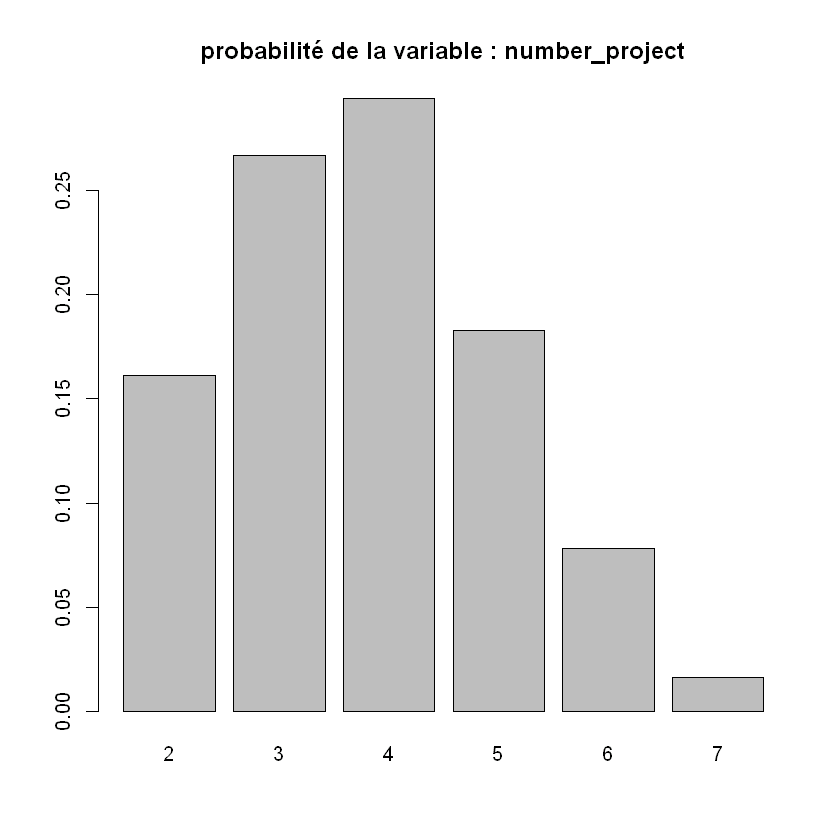

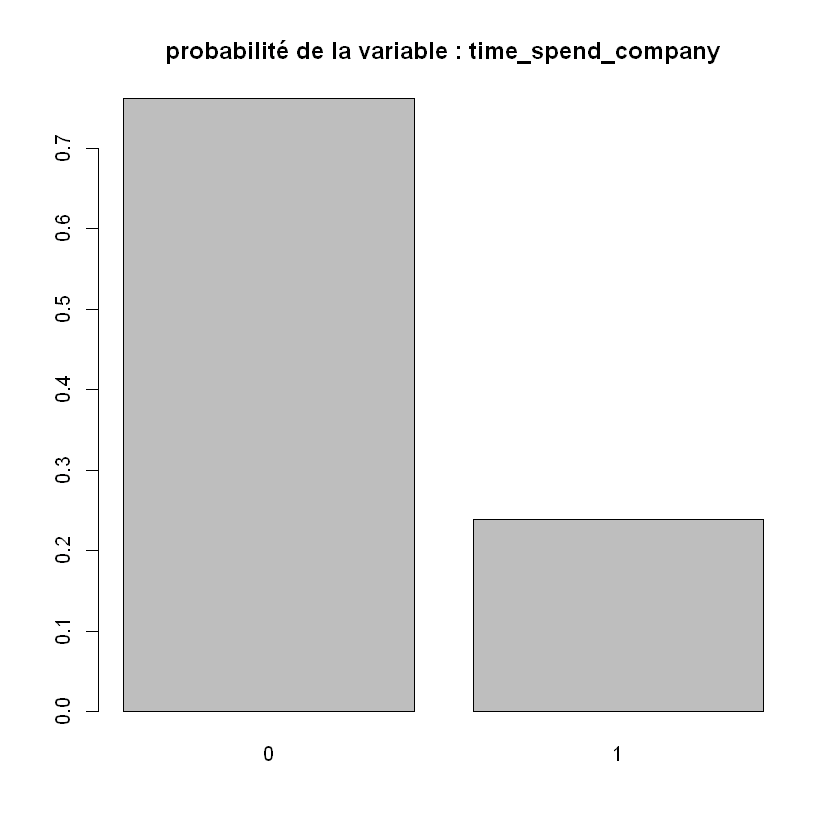

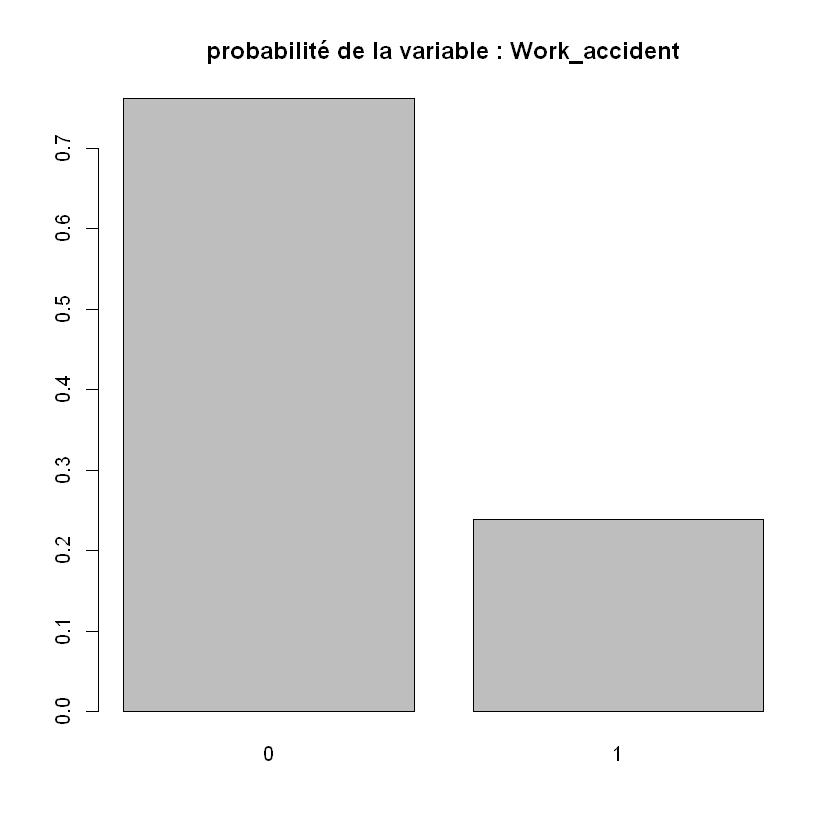

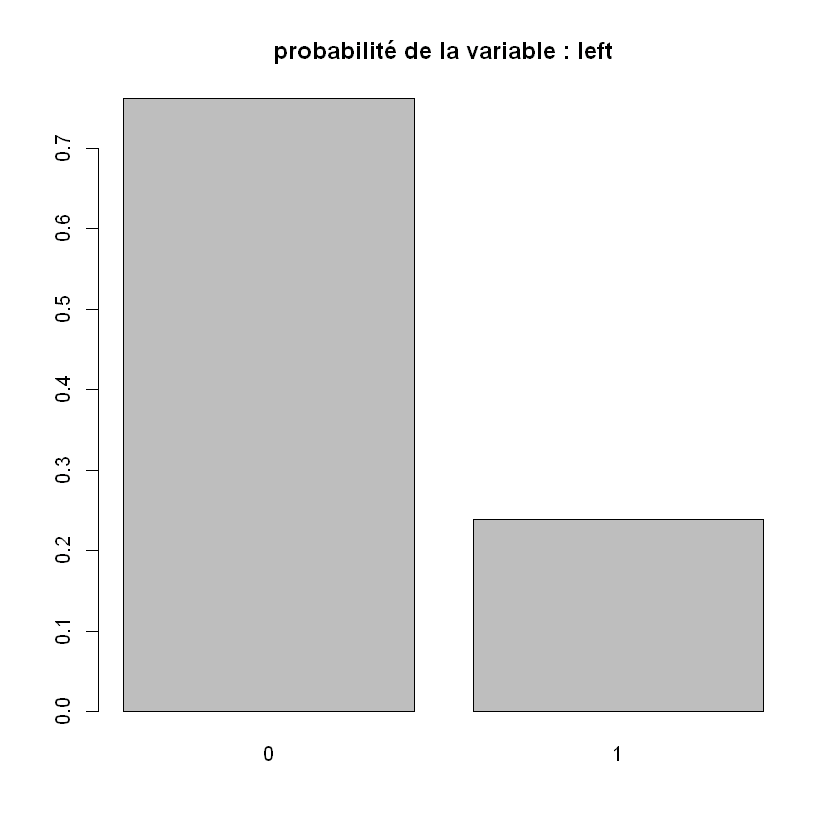

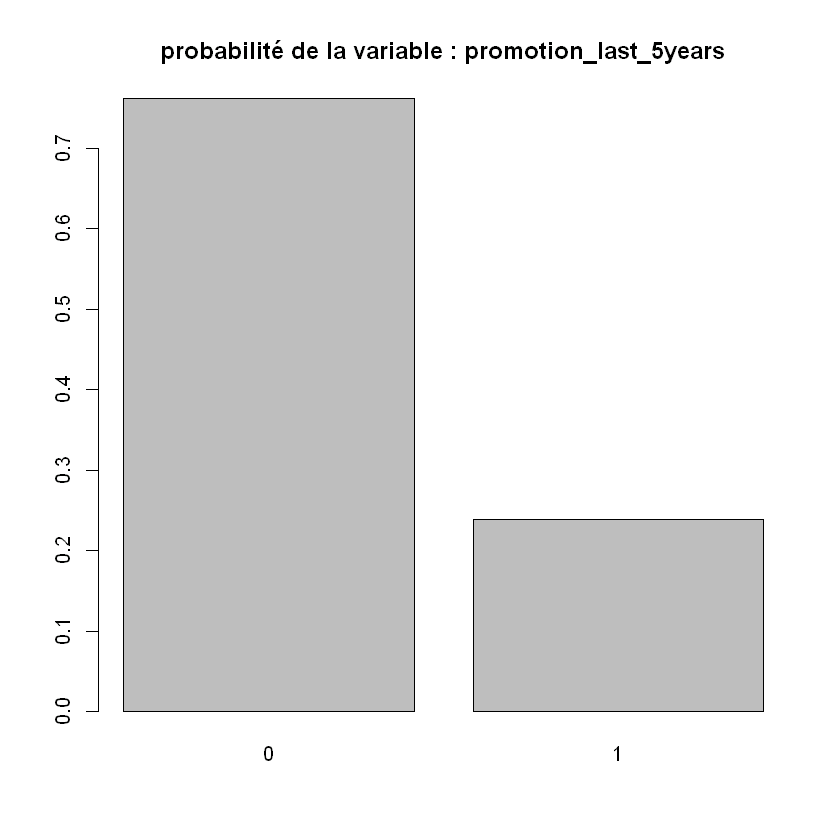

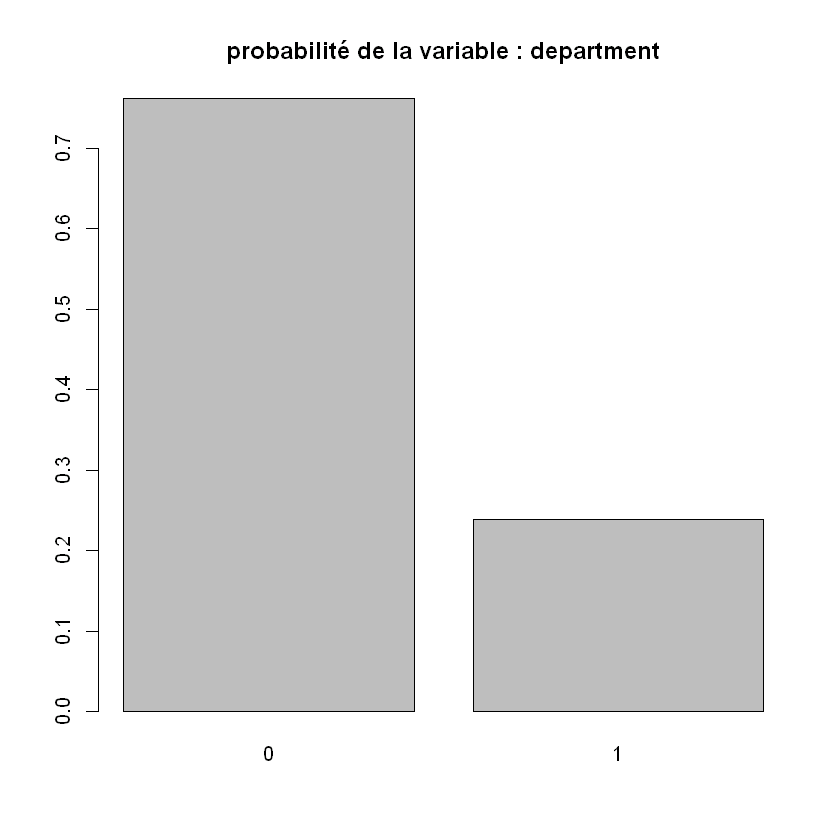

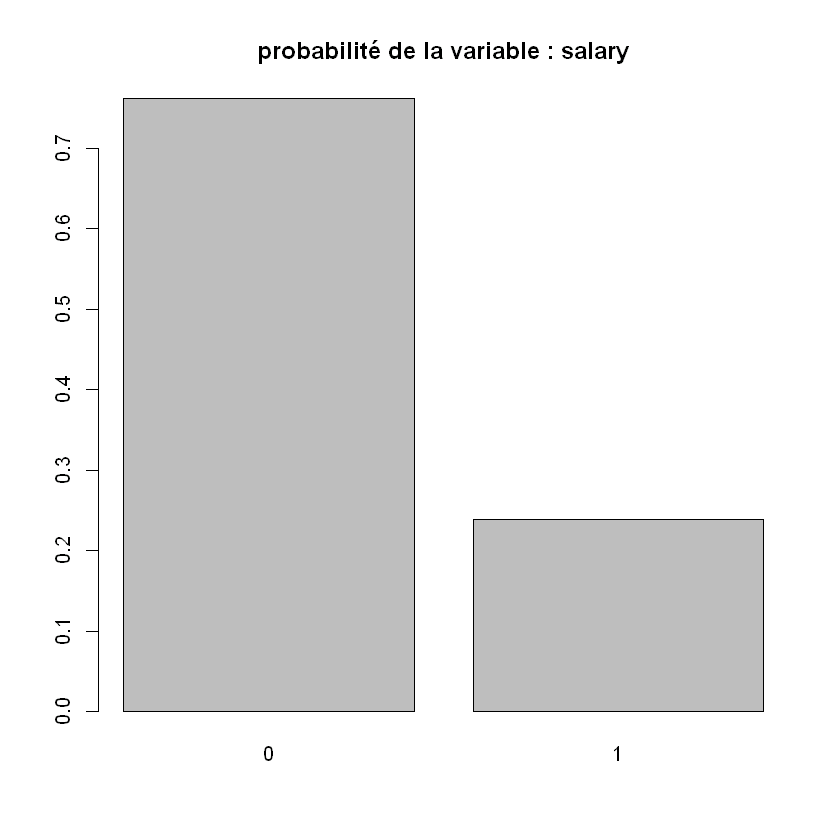

In [14]:
#Distribution marginale des attributs qualitatifs suivants number_project; time_spend_company; Work_accident; promotion_last_5years; department; salary
print(paste("Distribution de probabilité pour '",names(myData)[3],"'",sep=""))
print(prop.table(table(myData[,3])))
barplot(prop.table(table(myData[,3])), main=paste("probabilité de la variable :", names(myData)[3]))

for(i in 5:(dim(myData)[2]) ){
    cat("\n###################################\n")
    print(paste("Distribution de probabilité pour '",names(myData)[i],"'",sep=""))
    print(prop.table(table(myData[,i])))
    
}

for(i in 5:(dim(myData)[2]) ){
	barplot(prop.table(table(myData[,index])), main=paste("probabilité de la variable :", names(myData)[i]) )
}

[1] "probabilité de number_project sachant left"


    number_project
left          2          3          4          5          6          7
   0 0.34779913 0.98314607 0.90992522 0.76641138 0.45338442 0.00000000
   1 0.65220087 0.01685393 0.09007478 0.23358862 0.54661558 1.00000000


#############################
[1] "Probabilité de time_spend_company sachant left"
    time_spend_company
left     10      2      3      4      5      6      7      8
   0 0.0146 0.2135 0.3263 0.1083 0.0427 0.0337 0.0126 0.0102
   1 0.0000 0.0036 0.1062 0.0583 0.0557 0.0143 0.0000 0.0000

#############################
[1] "Probabilité de Work_accident sachant left"
    Work_accident
left      0      1
   0 0.6277 0.1342
   1 0.2264 0.0117

#############################
[1] "Probabilité de left sachant left"
      left
left.1      0      1
     0 0.7619 0.0000
     1 0.0000 0.2381

#############################
[1] "Probabilité de promotion_last_5years sachant left"
    promotion_last_5years
left      0      1
   0 0.7420 0.0199
   1 0.2369 0.0012

#############################
[1] "Probabilité de department sachant left"
    department
left accounting     hr     IT management marketing product_mng  RandD  sales
   0     0.0376 0.0369 0.0643     0.0355    0.0423      0.0485 0.0450 0.20

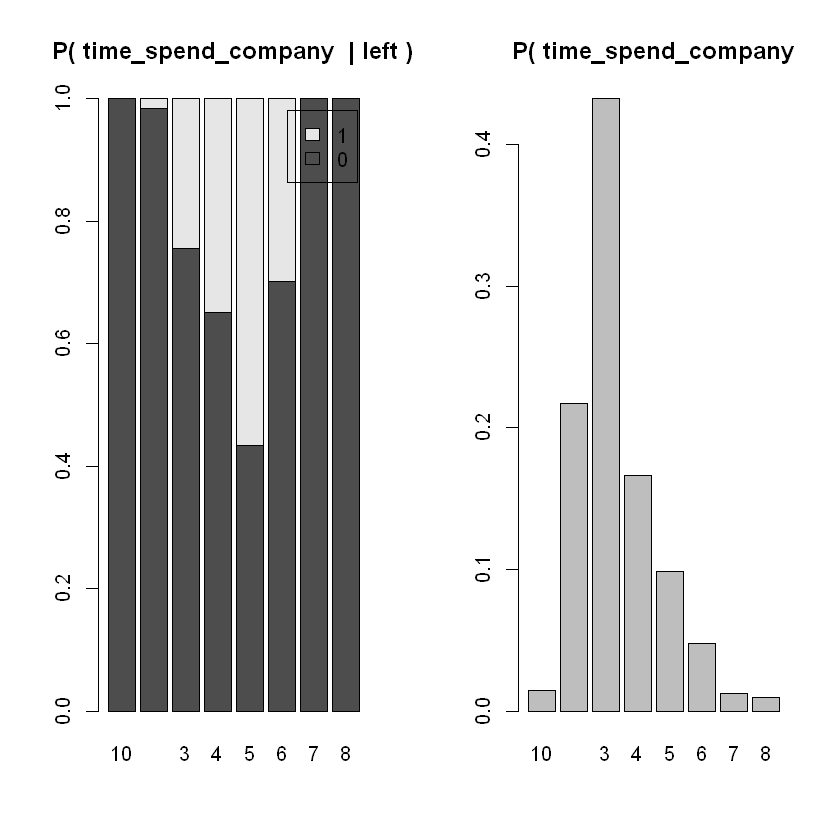

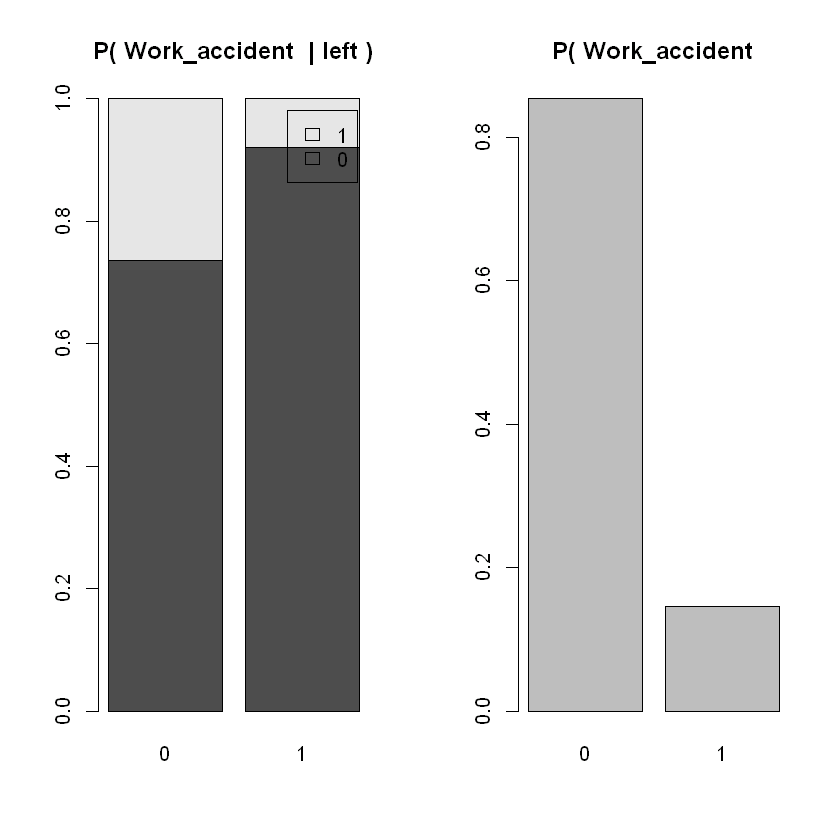

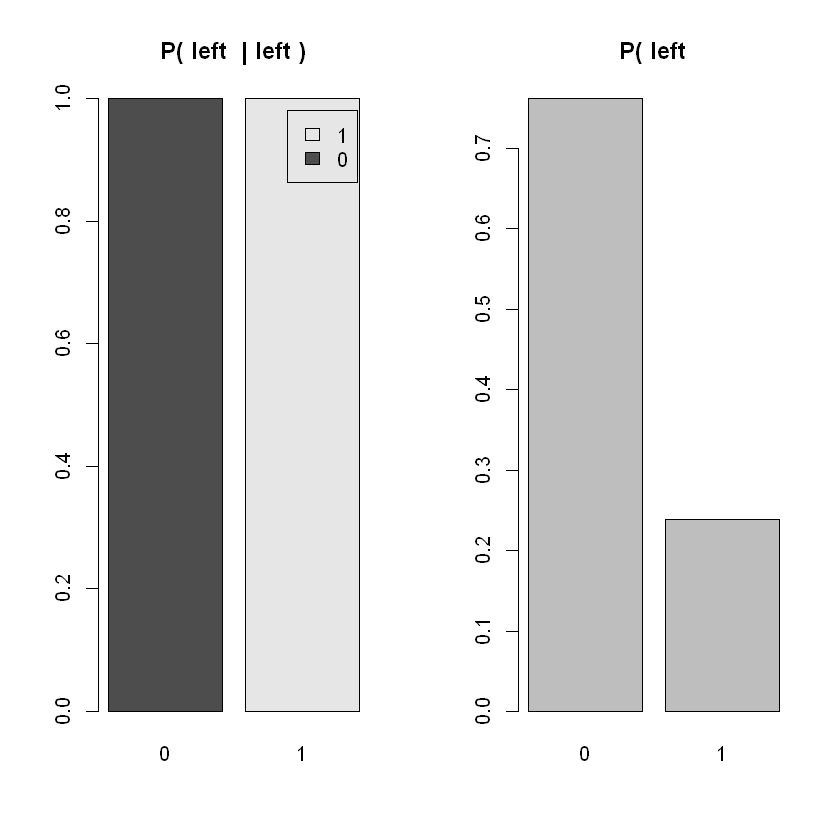

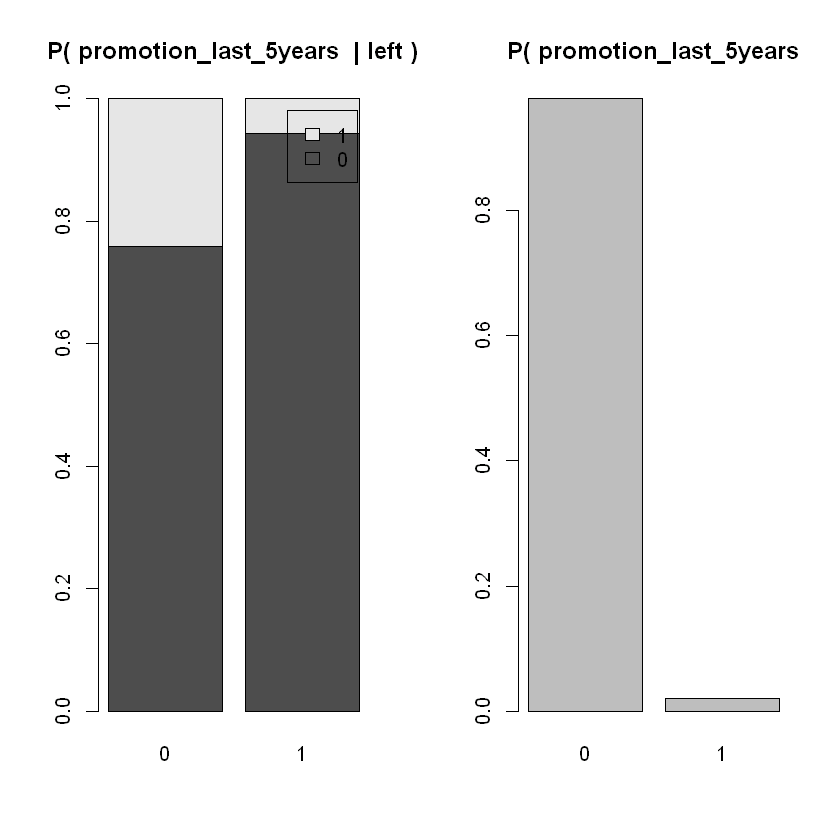

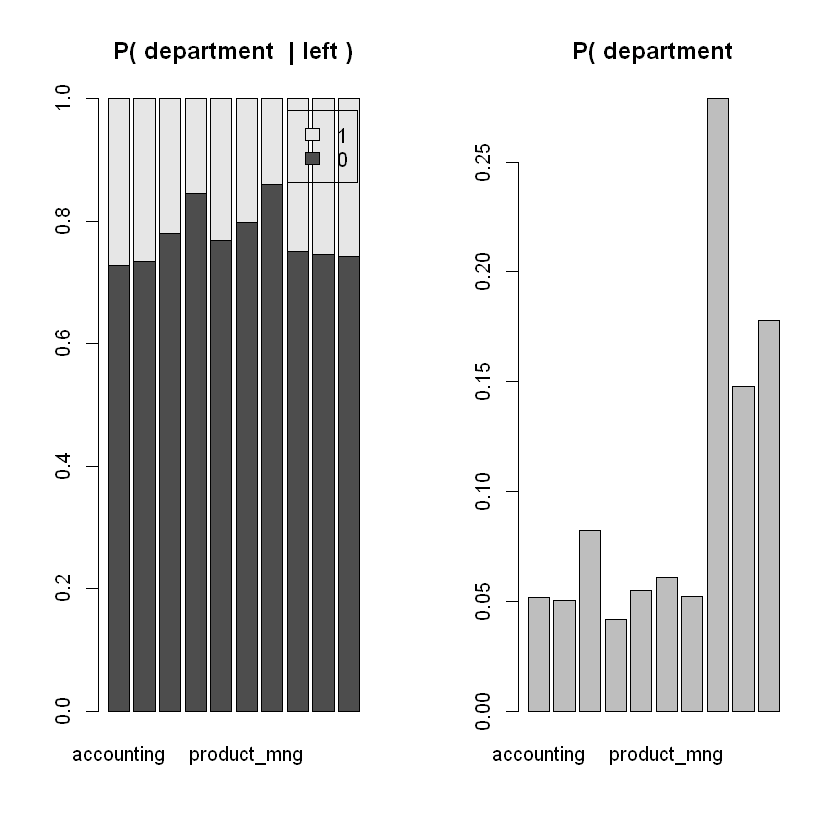

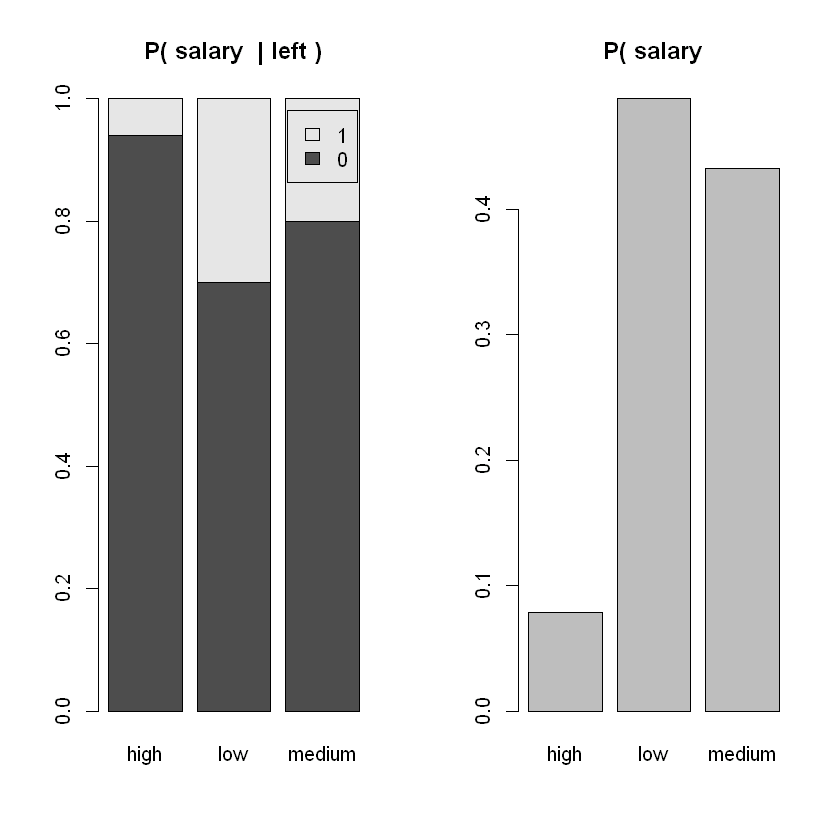

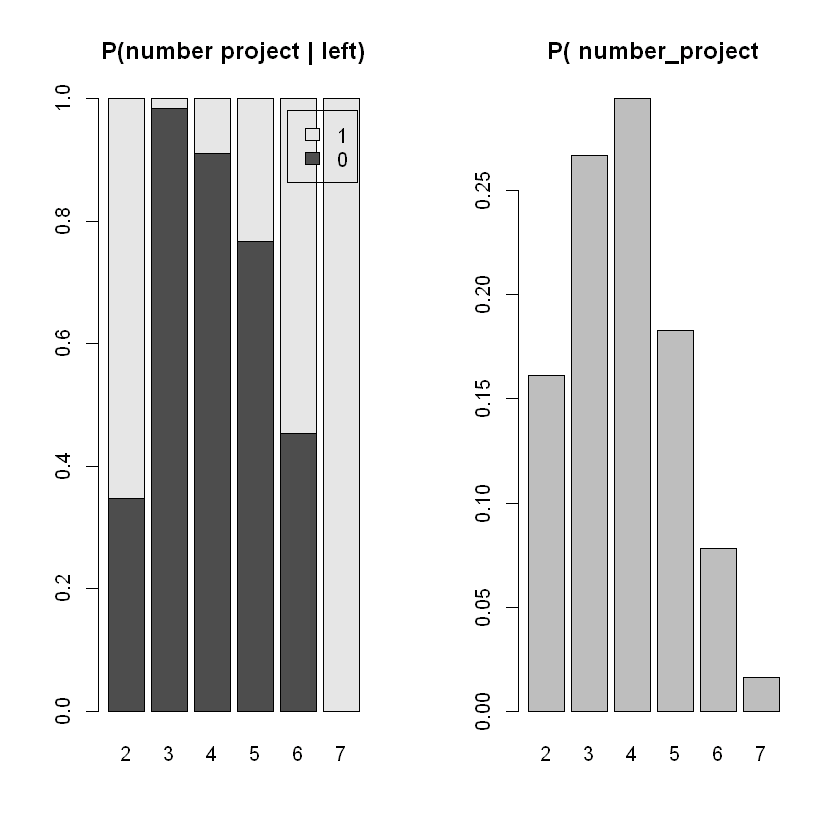

In [15]:
#Probabilité conditionnelle des attributs qualitatifs suivants number_project; time_spend_company; Work_accident; promotion_last_5years; department; salary
print("probabilité de number_project sachant left")
t(prop.table(table(myData[,c(3,7)]),1))


for(y in 5:(dim(myData)[2])){
    cat("\n#############################\n")
    print(paste("Probabilité de ", names(myData)[y], " sachant left",sep=""))
    continTable <-table(myData[,c(y,7)])
    print(t(prop.table(continTable)))
    
}

par(mfrow = c(1, 2))

for(y in 5:(dim(myData)[2]) ){
    continTable <- table(myData[, c(y, 7)])
	barplot(t(prop.table(continTable,1)), main= paste("P(", names(myData)[y], " | left )"), legend=TRUE      
)
    barplot(prop.table(table(myData[,y])), main=paste("P(", names(myData)[y]) )
}

barplot(t(prop.table(table(myData[,c(3,7)]),1)), main="P(number project | left)", legend=TRUE)
barplot(prop.table(table(myData[,3])), main=paste("P(", names(myData)[3]) )

Critère pour déterminer si un attribut est fortement liés à la variable cible :
- 1 : La distribution de l'attribut montre une grande population, ce qui le rend pertinent pour une analyse conditonnée à la variable cible
- 2 : J'observe une variation significative entre les différentes catégorie (si oui, alors l'attribut est potentiellement fortement liée à la variable cible

OBSERVATION:
Basé sur l'observation des visualisations et l'application des critères ci-dessus, 
voici les attributs qualitatifs ayant le plus d'impact sur la variable cible :
- salary
- number_project


##### 2.3 Analyse exploratoire des attributs quantitatifs

In [16]:
# Statistiques descriptives des attributs quantitatifs suivants : 
# satisfaction_level; last_evaluation; average_montly_hours
quant_attr <- c(1,2,4)
#A) Moyenne de chaque attribut quantitatif
print("MOYENNES de chaque attribut ")
colMeans(myData[,quant_attr])

#B) Variance de chaque attribut quantitatif (dans la diagonale)
print("VARIANCES de chaque attribut ")
diag(var(myData[,quant_attr]))

#C) Moyenne conditionnelle de chaque attribut quantitatif lorsque LEFT = 0 
print("MOYENNES CONDITIONNELLES de chaque attribut pour LEFT=0")
moyCond_parti <- colMeans(myData[myData[,7]==0,quant_attr])
print(moyCond_parti)
#D) Moyenne conditionnelle de chaque attribut quantitatif lorsque LEFT = 1
print("MOYENNES CONDITIONNELLES de chaque attribut pour LEFT=1")
moyCond_reste <- colMeans(myData[myData[,7]==1,quant_attr])
print(moyCond_reste)
#E) Variance conditionnelle de chaque attribut quantitatif lorsque LEFT = 0 
print("VARIANCES CONDITIONNELLES de chaque attribut pour LEFT=0")
varCond_reste <- diag(var(myData[myData[,7]==0,quant_attr]))
print(varCond_reste)
#F) Variance conditionnelle de chaque attribut quantitatif lorsque LEFT = 1
print("VARIANCES CONDITIONNELLES de chaque attribut pour LEFT=1")
varCond_parti <- diag(var(myData[myData[,7]==1,quant_attr]))
print(varCond_parti)
#G) Écart-Type de chaque attribut quantitatif
print("ÉCART-TYPES de chaque attribut")
ecart_type <- sqrt(diag(var(myData[,quant_attr])))
print(ecart_type)
#H) Score pour chaque attribut quantitatif 
print("SCORES de chaque attribut")
scores <- abs(moyCond_reste - moyCond_parti)/ecart_type
scores_ordonnees <- sort(scores, decreasing = TRUE)
print(scores_ordonnees)

[1] "MOYENNES de chaque attribut "


satisfaction_level      last_evaluation average_montly_hours 
            0.613989             0.717581           200.686300

[1] "VARIANCES de chaque attribut "


satisfaction_level      last_evaluation average_montly_hours 
        6.120140e-02         2.956431e-02         2.484202e+03

[1] "MOYENNES CONDITIONNELLES de chaque attribut pour LEFT=0"
  satisfaction_level      last_evaluation average_montly_hours 
           0.6672687            0.7173894          198.7671610 
[1] "MOYENNES CONDITIONNELLES de chaque attribut pour LEFT=1"
  satisfaction_level      last_evaluation average_montly_hours 
           0.4434985            0.7181940          206.8273835 
[1] "VARIANCES CONDITIONNELLES de chaque attribut pour LEFT=0"
  satisfaction_level      last_evaluation average_montly_hours 
        4.665847e-02         2.651144e-02         2.088346e+03 
[1] "VARIANCES CONDITIONNELLES de chaque attribut pour LEFT=1"
  satisfaction_level      last_evaluation average_montly_hours 
        6.960998e-02         3.934800e-02         3.702801e+03 
[1] "ÉCART-TYPES de chaque attribut"
  satisfaction_level      last_evaluation average_montly_hours 
           0.2473892            0.1719428           49.8417728 
[1] "SCORES de chaque attribut"
  satisfaction_level average_montly_hours

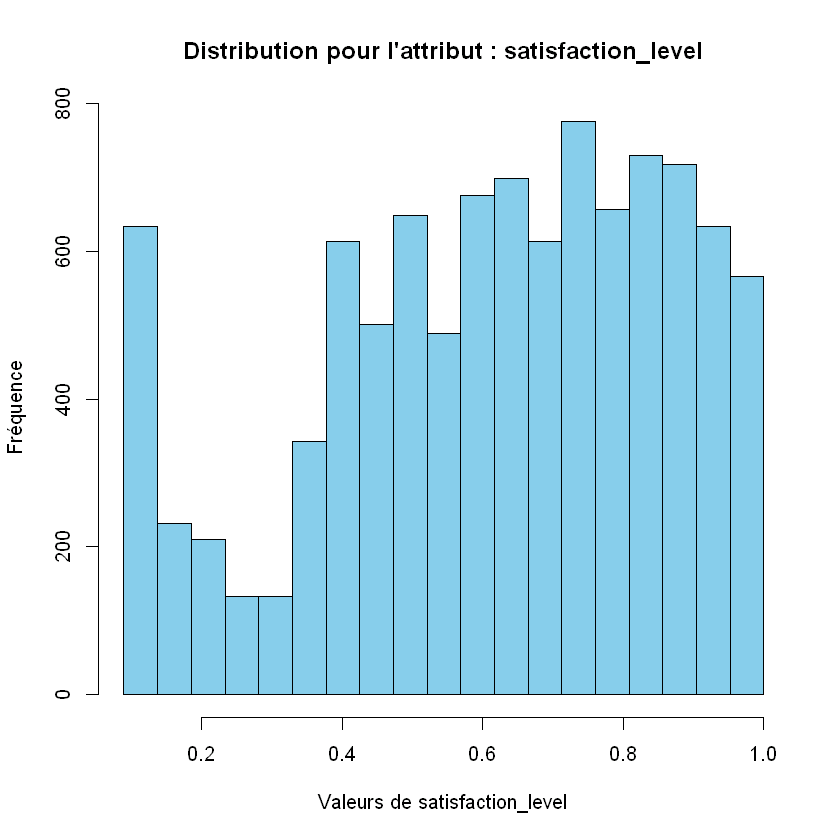

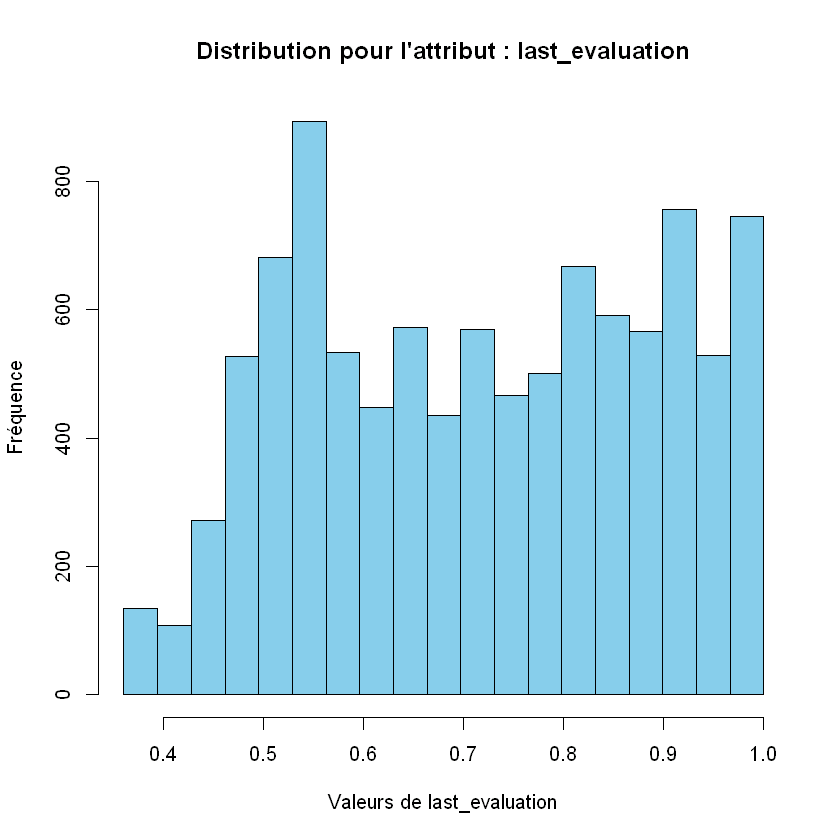

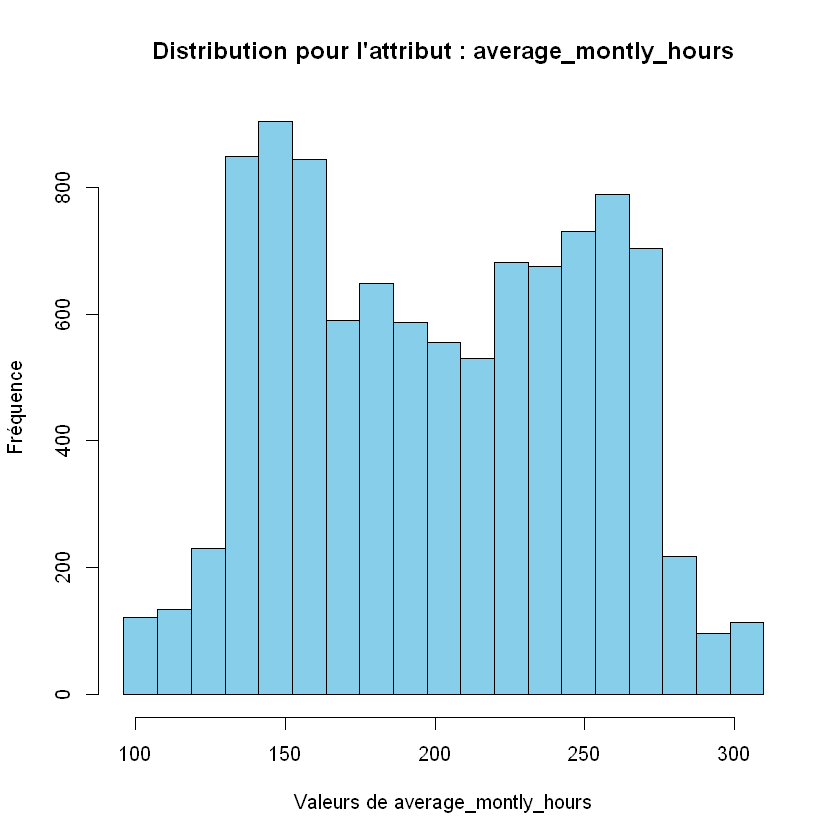

In [17]:
#2.3.2 Visualisation des distributions des attributs quantitatifs
#A Visualisation de la distribution pour chaque attribut
for (i in 1:4){
    if(i!=3){
    #sélection de l'attribut quantitatif
    attribut_quantitatif <- myData[,i]

   # Calcul des intervalles
    minX <- min(myData[,i])
    maxX <- max(myData[,i])
    breaks1 = seq(from = minX, to = maxX, length.out=20)

    #histogramme
    hist(attribut_quantitatif, breaks = breaks1, col = "skyblue", border = "black",
     main = paste("Distribution pour l'attribut :", colnames(myData)[i]),
         xlab = paste("Valeurs de", colnames(myData)[i]), ylab = "Fréquence")
    }
}

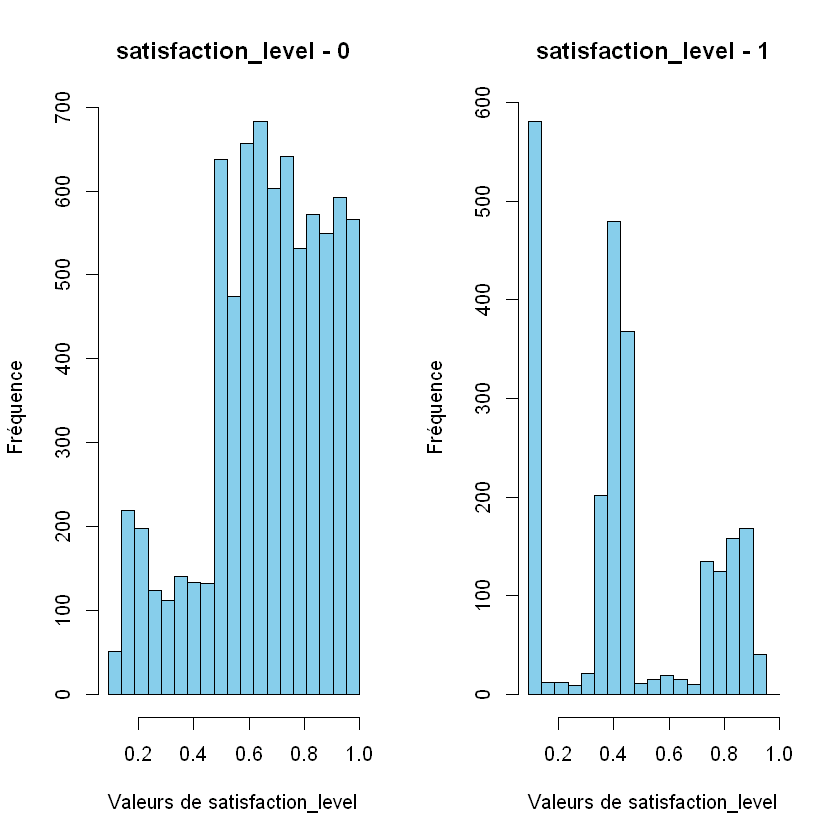

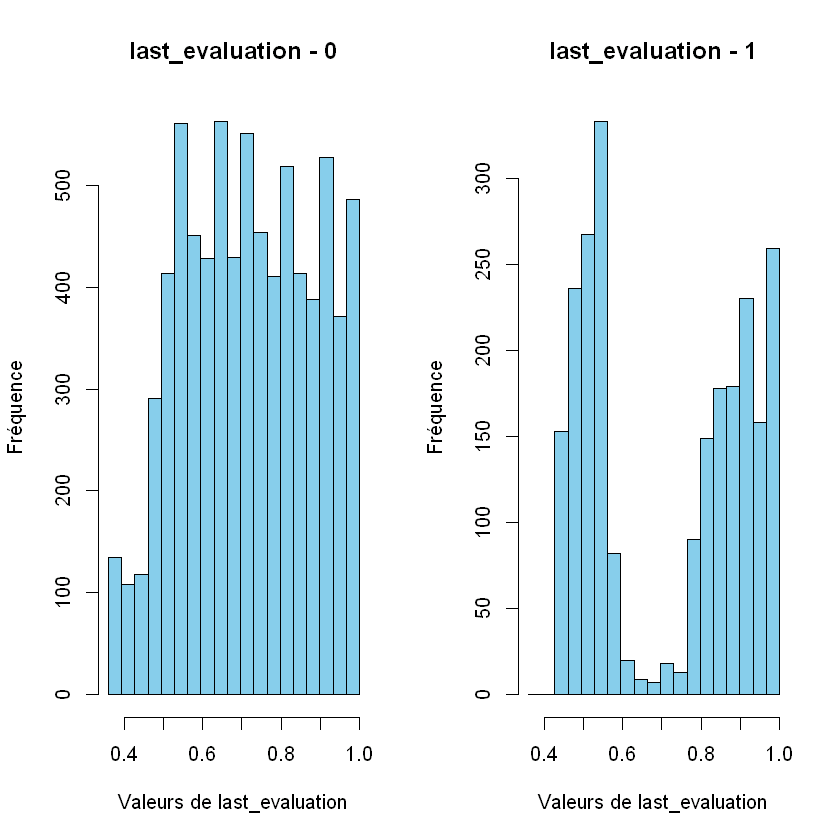

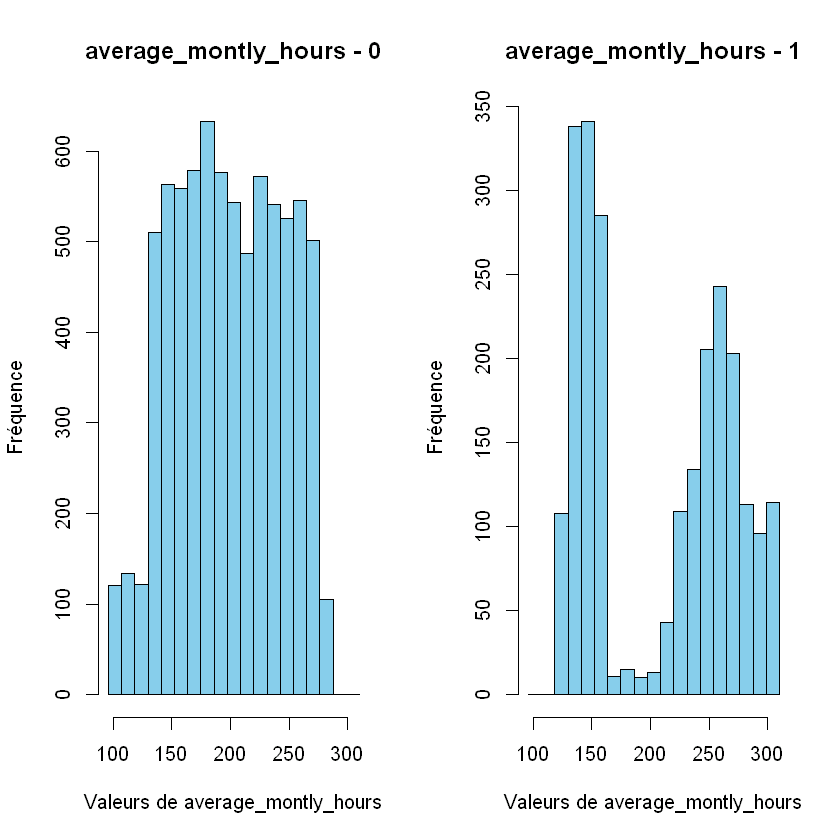

In [18]:
#B Visualisation de la distribution conditionnelle de chaque attribut en fonction de left
# Identifier les catégories dans la colonne 7
par(mfrow = c(1, 2))
categories <- unique(myData[, 7])

for (col in 1:4) {
  if(col!=3){
    # Boucle sur chaque catégorie
    for (cat in categories) {
    # Filtrer les données pour la catégorie actuelle
    subset_data <- myData[myData[, 7] == cat, col]
    
    # Calcul des intervalles
    minX <- min(myData[,col])
    maxX <- max(myData[,col])
    breaks = seq(from = minX, to = maxX, length.out=20)
    
    # Histogramme
    hist(subset_data, breaks = breaks, col = "skyblue", border = "black",
         main = paste( colnames(myData)[col], "-", cat),
         xlab = paste("Valeurs de", colnames(myData)[col]), ylab = "Fréquence")
    }
  }
}

Étant donné que l'analyse exploratoire des attributs quantitatifs a pour but de déterminer s'il y en a qui ont une corrélation avec la variable cible, je ne tracerai pas de courbe normale sur mes histogrammes car la loi normale n'a pas pour but d'aider à déterminer si un attribut et corrélé a une variable cible. Je ne tracerai pas non plus de diagramme de dispersion car cela n'est pertinent que dans le cas ou la variable cible serait de type quantitatif, ce qui n'est pas le cas.

OBSERVATION
Après analyse statistique et observation des visualisations, on constate que l'attribut le plus corrélé a la variable cible est SATISFACTION_LEVEL car on remarque qu'il y a une grande différence entre ses moyennes conditionnelles. 
On remarque aussi que le score est le plus élevé pour cette attribut que les autres et, pour finir, la visualisation des distribution
conditionnée nous montre plusieurs pique et une asymétrie entre les deux distributions.
Les éléments cités ci-dessus sont généralement le signe d'une grande corrélation entre l'attribut et la variable cible !

#### 3. NAIVE BAYES

Nous allons entraîner 5 fois l'algorithm Naive Bayes afin de faire une moyenne sur les Taux de Bien Classés (TBC) pour tester l'efficacité du modèle

In [19]:
# Function targetVar:
# Create the train dataset 66% of the original dataset picked randomly.
# Use the last 33% as test dataset
# Repeat it n times to have n train and n test datasets to use with the Naive Base model
# In our case we will train and test it 5 times to then compare them
targetVar <- 7
trainTestnb <- function(range_n) {
    accuracies <- c()
    lastModel <- NULL
    # We control the randomness
    set.seed(1)
    for (i in 1:range_n) {
        # Split the dataset in two equal parts
        trainIndex <- sample(1:dim(myData)[1],size=0.66*dim(myData)[1])
        trainData <- myData[trainIndex,]
        testData <- myData[-trainIndex,]
        
        # Train a Naive Bayes on the train dataset
        nb <- naiveBayes(formula=left~.,data=trainData)
        lastModel <- nb
        
        # Get the predictions and calculate the number of correct predictions
        predictions <- predict(nb, testData)
        numCorrect <- sum(diag(table(testData[,targetVar],predictions)))
        TBC <- numCorrect/nrow(testData)
        
        accuracies[i] <- TBC
    }
    # Return a list containing both accuracies, the last model and the last test set to use for later
    results <- list(accuracies = accuracies, lastModel = lastModel, testData = testData)
    return(results)
}

# We decide how many model we want to create
nbModels <- 5
nbTrained <- trainTestnb(nbModels)

# Print the 5 TBC and the last NB model
print("Taux de Bien Classés, TBC) pour les 5 modèles appris par Naive Bayes:")
print(nbTrained$accuracies)
print("-----------------------")
print("Dernier modèle appris par Naive Bayes:")
print(nbTrained$lastModel)

[1] "Taux de Bien Classés, TBC) pour les 5 modèles appris par Naive Bayes:"
[1] 0.8579412 0.8541176 0.8544118 0.8602941 0.8620588
[1] "-----------------------"
[1] "Dernier modèle appris par Naive Bayes:"

Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
        0         1 
0.7569697 0.2430303 

Conditional probabilities:
   satisfaction_level
Y        [,1]      [,2]
  0 0.6660829 0.2159633
  1 0.4513342 0.2638504

   last_evaluation
Y        [,1]      [,2]
  0 0.7193034 0.1637386
  1 0.7188778 0.1981181

   number_project
Y            2          3          4          5          6          7
  0 0.07045637 0.34647718 0.34907926 0.18855084 0.04543635 0.00000000
  1 0.43827930 0.02057357 0.11783042 0.18142145 0.16458853 0.07730673

   average_montly_hours
Y       [,1]     [,2]
  0 198.4742 45.73735
  1 206.6951 60.65338

   time_spend_company
Y           10          2          3          4          5    

Afin de tester la performance des modèles appris par Naive Bayes, nous pouvons comparer la moyenne des TBC à la performance de base, qui est la proportion de la classe majoritaire. Cela représente la précision que vous obtiendriez en prédisant toujours la classe majoritaire. Dans notre cas, elle est de 76,19 % :

In [20]:
# Print the mean of the accuracies
accMean <- mean(nbTrained$accuracies)
print("Mean of the accuracies (percentage):")
sprintf("%.2f%%", accMean * 100)

# Compare it with the percentage of the majority class
print(prop.table(table(myData[,targetVar])) * 100)

[1] "Mean of the accuracies (percentage):"


[1] "85.78%"


    0     1 
76.19 23.81 


Les modèles appris par Naive Bayes se révèlent être performants dans le cadre de notre projet. 
Avec une précision de 85,78 %, ils surpassent de manière significative la performance de base de 76,19 %, qui serait obtenue simplement en prédisant systématiquement la classe majoritaire.
Cette amélioration notable en termes de précision indique que le modèle Naive Bayes capture efficacement les relations sous-jacentes dans les données pour prédire si un employé quittera l’entreprise.

#### 4. CONCLUSIONS

Sur la base de nos résultats, nous sommes en mesure de prédire si un employé quittera l’entreprise ou non avec un bon taux de précision. Le modèle Naive Bayes, en affichant une performance supérieure à celle du simple modèle de base, démontre une capacité fiable à identifier les signaux clés menant au départ d'un employé. Ces conclusions sont prometteuses pour une application pratique en gestion des ressources humaines, permettant d'intervenir de manière proactive pour retenir les talents au sein de l'organisation. Cependant, il est également essentiel d'explorer d'autres modèles ou de combiner plusieurs approches pour continuer à améliorer la précision et la robustesse des prédictions dans divers contextes d'application.